# Gaussian discriminant analysis in 2d

Author: Duane Rich, heavily modified by Kevin Murphy  
Based on matlab code by Kevin Murphy  
https://github.com/probml/pmtk3/blob/master/demos/discrimAnalysisDboundariesDemo.m

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate mean for multivariate gaussian
sample_size = 30

# # model1
# means = [[1.5, 1.5], [-1.5, -1.5]]
# covs = [np.eye(2)] * 2 # spherical covariances
# # model2
# means = [[1.5, 1.5], [-1.5, -1.5]]
# covs = [
#     [[1.5, 0], [0, 1]], # diagonal covariance
#     np.eye(2) * 0.7 # spherical covariance
# ]
# # model3
# means = [[0, 0], [0, 5], [5, 5]]
# covs = [np.eye(2)] * 3 # spherical covariances
# model4
means = [[0, 0], [0, 4], [4, 4]]
covs = [
    [[4, 1], [1, 2]], # full covariance
    [[2, 0], [0, 1]], # diagonal covariance
    [[1, 0], [0, 1]]  # spherical covariance
]
nclasses = len(means)
assert nclasses == len(covs)

In [3]:
# Generate random points for multivariate gaussian
rng = np.random.default_rng()
samples = [
    rng.multivariate_normal(mean, cov, size=sample_size) \
        for mean, cov in zip(means, covs)
]
labels = [np.full(sample_size, label) for label in range(nclasses)]

In [4]:
# Maximum likelihood covariance estimator (biased)
from sklearn.covariance import empirical_covariance
[empirical_covariance(x) == np.cov(x, rowvar=False, bias=True) for x in samples]

[array([[ True,  True],
        [ True,  True]]),
 array([[ True,  True],
        [ True,  True]]),
 array([[ True,  True],
        [ True,  True]])]

In [5]:
def make_grid(samples, ngrid=300):
    points = np.concatenate(samples, axis=0)
    x_min, y_min = np.min(points, axis=0)
    x_max, y_max = np.max(points, axis=0)
    x_range = np.linspace(x_min - 1, x_max + 1, ngrid)
    y_range = np.linspace(y_min - 1, y_max + 1, ngrid)
    xx, yy = np.meshgrid(x_range, y_range)
    return xx, yy

xx, yy = make_grid(samples)
xy = np.stack((xx, yy), axis=-1)

xx.shape, yy.shape, xy.shape

((300, 300), (300, 300), (300, 300, 2))

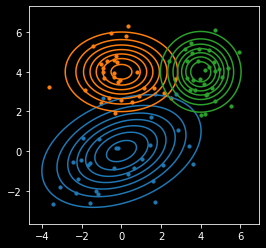

In [6]:
from scipy.stats import multivariate_normal
from matplotlib.colors import TABLEAU_COLORS

# plot points and coutours of multivariate gaussians
_, ax = plt.subplots()
ax.set_aspect('equal')
for x, mean, cov, c in zip(samples, means, covs, TABLEAU_COLORS):
    ax.scatter(x[:, 0], x[:, 1], s=10, color=c)
    ax.contour(xx, yy, multivariate_normal.pdf(xy, mean=mean, cov=cov), colors=c)

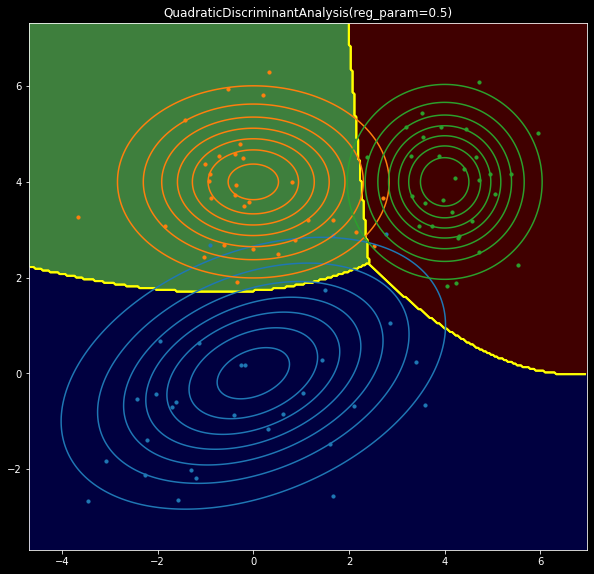

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

_, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')

# fit model with samples
# clf = LinearDiscriminantAnalysis()
clf = QuadraticDiscriminantAnalysis(reg_param=0.5)
X = np.concatenate(samples, axis=0) # shape (sample_size * nclasses, 2)
Y = np.concatenate(labels) # shape (sample_size * nclasses,)
clf.fit(X, Y)
ax.set_title(str(clf))

# plot boundaries
Z = clf.predict(np.stack((xx.ravel(), yy.ravel()), axis=-1)) # shape (sample_size * nclasses,)
ax.pcolormesh(xx, yy, Z.reshape(xx.shape), alpha=0.5, cmap='jet')
for z_p in OneHotEncoder(sparse=False).fit_transform(Z[:,np.newaxis]).T:
    ax.contour(xx, yy, z_p.reshape(xx.shape), levels=[0.5], linewidths=2, colors='yellow')

# plot points and coutours of multivariate gaussians
for x, mean, cov, c in zip(samples, means, covs, TABLEAU_COLORS):
    ax.scatter(x[:, 0], x[:, 1], s=10, color=c)
    ax.contour(xx, yy, multivariate_normal.pdf(xy, mean=mean, cov=cov), colors=c)